# Laboratorio 3
*   Juan Camilo Quiroz Prada
2283530
*  Javier Santiago Naranjo
2283523

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats
import skimage
import imageio
import scipy.ndimage as ndimage
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage.filters
import matplotlib.image as mpimg
from skimage import io, data, util, metrics
from matplotlib import pyplot as plt
from skimage.color import rgb2gray, gray2rgb
from PIL import Image, ImageDraw
from skimage.morphology import (erosion, dilation, opening, closing,
                                white_tophat)
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Deep learning/lab3'

/content/drive/MyDrive/Deep learning/lab3


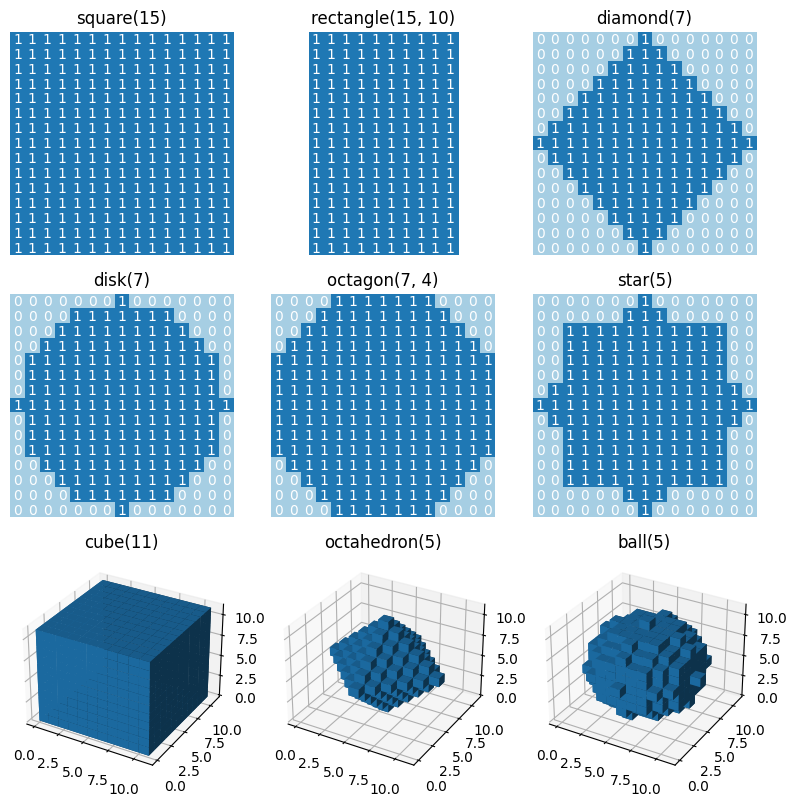

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from skimage.morphology import (square, rectangle, diamond, disk, cube,
                                octahedron, ball, octagon, star)

# Se generan elementos estructurantes 2D y 3D.
struc_2d = {
    "square(15)": square(15),
    "rectangle(15, 10)": rectangle(15, 10),
    "diamond(7)": diamond(7),
    "disk(7)": disk(7),
    "octagon(7, 4)": octagon(7, 4),
    "star(5)": star(5)
}

struc_3d = {
    "cube(11)": cube(11),
    "octahedron(5)": octahedron(5),
    "ball(5)": ball(5)
}

# Se visualizan los elementos.
fig = plt.figure(figsize=(8, 8))

idx = 1
for title, struc in struc_2d.items():
    ax = fig.add_subplot(3, 3, idx)
    ax.imshow(struc, cmap="Paired", vmin=0, vmax=12)
    for i in range(struc.shape[0]):
        for j in range(struc.shape[1]):
            ax.text(j, i, struc[i, j], ha="center", va="center", color="w")
    ax.set_axis_off()
    ax.set_title(title)
    idx += 1

for title, struc in struc_3d.items():
    ax = fig.add_subplot(3, 3, idx, projection=Axes3D.name)
    ax.voxels(struc)
    ax.set_title(title)
    idx += 1

fig.tight_layout()
plt.show()

In [ ]:
def plot_comparison(original, filtered, filter_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

Referencias:
https://scikit-image.org/docs/stable/auto_examples/numpy_operations/plot_structuring_elements.html#sphx-glr-auto-examples-numpy-operations-plot-structuring-elements-py

https://scikit-image.org/docs/stable/auto_examples/applications/plot_morphology.html#sphx-glr-auto-examples-applications-plot-morphology-py

# Importacion de las imagenes

## LIEAG1

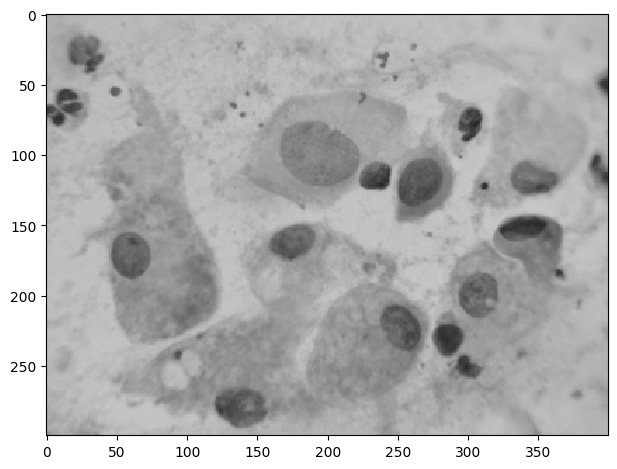

In [ ]:
# Cargar la imagen
LIEAG1 = io.imread('LIEAG1.jpg')
LIEAG1_g=rgb2gray(LIEAG1)
io.imshow(LIEAG1_g)
plt.show()

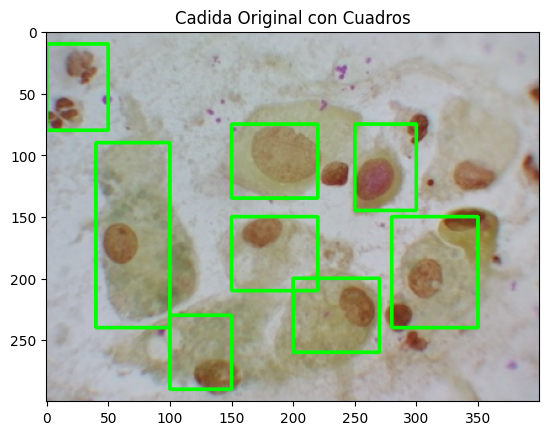

In [ ]:
LIEAG1_with_boxes = LIEAG1.copy()

# Definir las coordenadas de las regiones rectangulares a resaltar
# Cada región se especifica con (x, y, ancho, alto)
regiones_a_resaltar = [(0, 10, 50, 70), (40, 90, 60, 150), (100, 230, 50, 60), (200, 200, 70, 60), (150, 150, 70, 60), (150, 75, 70, 60), (250, 75, 50, 70),
                       (280, 150, 70, 90)]

# Dibujar cuadros verdes alrededor de las regiones especificadas
for (x, y, width, height) in regiones_a_resaltar:
    cv2.rectangle(LIEAG1_with_boxes, (x, y), (x + width, y + height), (0, 255, 0), 2)



# Mostrar la imagen con los cuadros verdes
# Visualizar la imagen original con cuadros, la imagen final y la imagen final con el filtro Tophat negro
plt.imshow(cv2.cvtColor(LIEAG1_with_boxes, cv2.COLOR_BGR2RGB))
plt.title('Cadida Original con Cuadros')
plt.show()

### Erosión

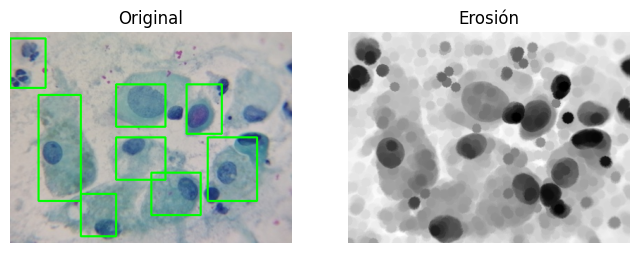

In [ ]:
footprint = disk(6)
eroded_LIEAG1= erosion(LIEAG1_g, footprint)
plot_comparison(LIEAG1_with_boxes, eroded_LIEAG1, 'Erosión')

### Dilatación

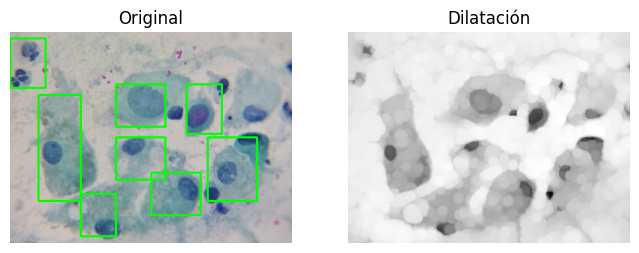

In [ ]:
dilated_LIEAG1= dilation(LIEAG1_g, footprint)
plot_comparison(LIEAG1_with_boxes, dilated_LIEAG1, 'Dilatación')

### Apertura

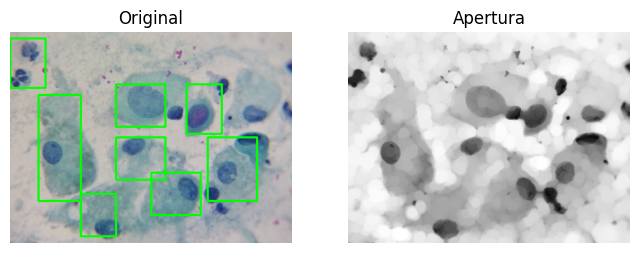

In [ ]:
opened_LIEG1= opening(LIEAG1_g, footprint)
plot_comparison(LIEAG1_with_boxes, opened_LIEG1, 'Apertura')

### Clausura

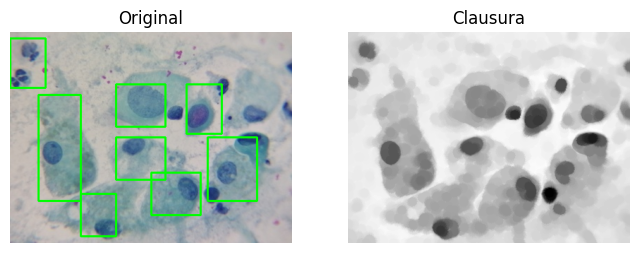

In [ ]:
closed_LIEAG1= closing(LIEAG1_g, footprint)
plot_comparison(LIEAG1_with_boxes, closed_LIEAG1, 'Clausura')

### Top Hat Blanco

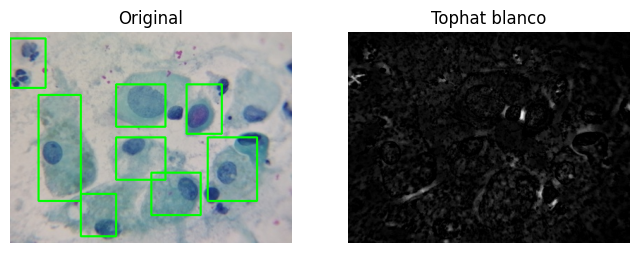

In [ ]:
LIEAG12 = LIEAG1_g.copy()
w_tophat_LIEAG1= white_tophat(LIEAG12, footprint)
plot_comparison(LIEAG1_with_boxes, w_tophat_LIEAG1, 'Tophat blanco')

### Top hat negro

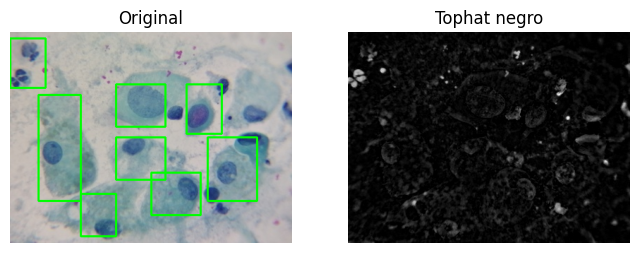

In [ ]:
b_tophat_LIEAG1= black_tophat(LIEAG12, footprint)
plot_comparison(LIEAG1_with_boxes, b_tophat_LIEAG1, 'Tophat negro')

## LIEBG1

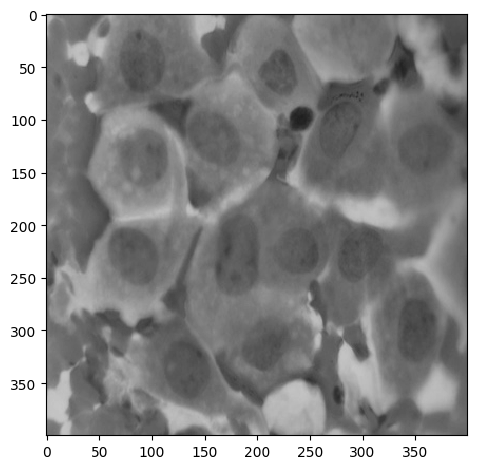

In [ ]:
# Cargar la imagen
LIEBG1 = io.imread('LIEBG1.jpg')
LIEBG1_g=rgb2gray(LIEBG1)
io.imshow(LIEBG1_g)
plt.show()

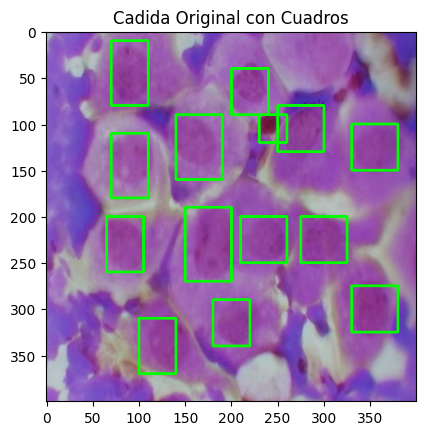

In [ ]:
LIEBG1_with_boxes = LIEBG1.copy()

# Definir las coordenadas de las regiones rectangulares a resaltar
# Cada región se especifica con (x, y, ancho, alto)
regiones_a_resaltar = [(70, 10, 40, 70), (70, 110, 40, 70), (65, 200, 40, 60), (100, 310, 40, 60), (140, 90, 50, 70), (150, 190, 50, 80),
                       (180, 290, 40, 50), (200, 40, 40, 50), (230, 90, 30, 30), (250, 80, 50, 50), (210, 200, 50, 50), (330, 100, 50, 50),
                       (275, 200, 50, 50), (330, 275, 50, 50)]

# Dibujar cuadros verdes alrededor de las regiones especificadas
for (x, y, width, height) in regiones_a_resaltar:
    cv2.rectangle(LIEBG1_with_boxes, (x, y), (x + width, y + height), (0, 255, 0), 2)



# Mostrar la imagen con los cuadros verdes
# Visualizar la imagen original con cuadros, la imagen final y la imagen final con el filtro Tophat negro
plt.imshow(cv2.cvtColor(LIEBG1_with_boxes, cv2.COLOR_BGR2RGB))
plt.title('Cadida Original con Cuadros')
plt.show()

### Erosión

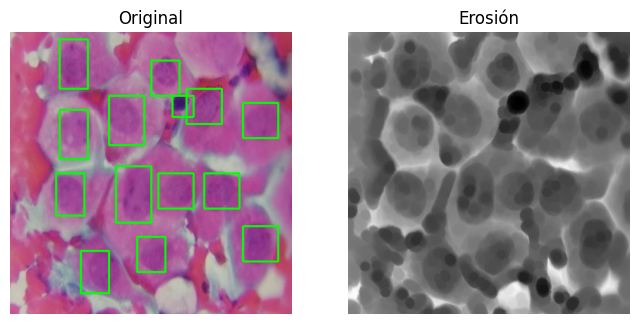

In [ ]:
footprint = disk(6)
eroded_LIEBG1= erosion(LIEBG1_g, footprint)
plot_comparison(LIEBG1_with_boxes, eroded_LIEBG1, 'Erosión')

### Dilatación

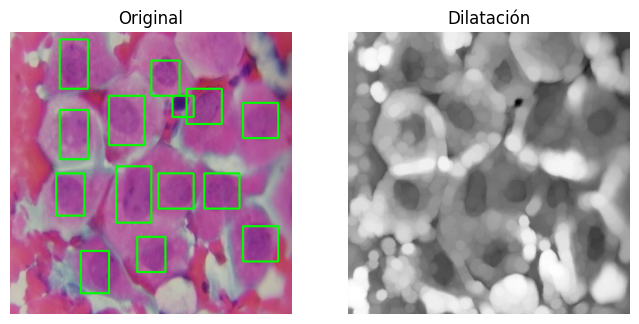

In [ ]:
dilated_LIEBG1= dilation(LIEBG1_g, footprint)
plot_comparison(LIEBG1_with_boxes, dilated_LIEBG1, 'Dilatación')

### Apertura

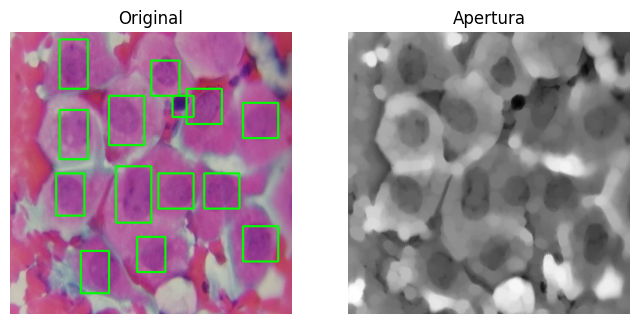

In [ ]:
opened_LIEBG1= opening(LIEBG1_g, footprint)
plot_comparison(LIEBG1_with_boxes, opened_LIEBG1, 'Apertura')

### Clausura

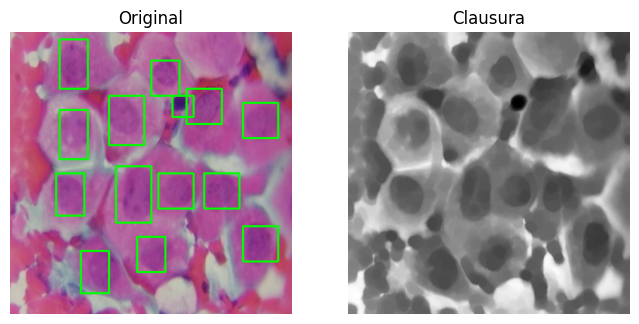

In [ ]:
closed_LIEBG1= closing(LIEBG1_g, footprint)
plot_comparison(LIEBG1_with_boxes, closed_LIEBG1, 'Clausura')

### Top Hat Blanco

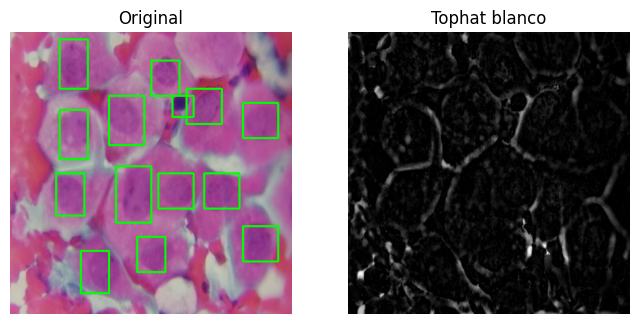

In [ ]:
LIEBG12 = LIEBG1_g.copy()
w_tophat_LIEBG1= white_tophat(LIEBG12, footprint)
plot_comparison(LIEBG1_with_boxes, w_tophat_LIEBG1, 'Tophat blanco')

### Top hat negro

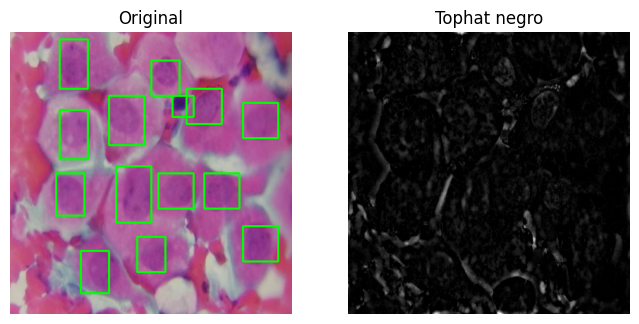

In [ ]:
b_tophat_LIEBG1= black_tophat(LIEBG12, footprint)
plot_comparison(LIEBG1_with_boxes, b_tophat_LIEBG1, 'Tophat negro')

## Candida

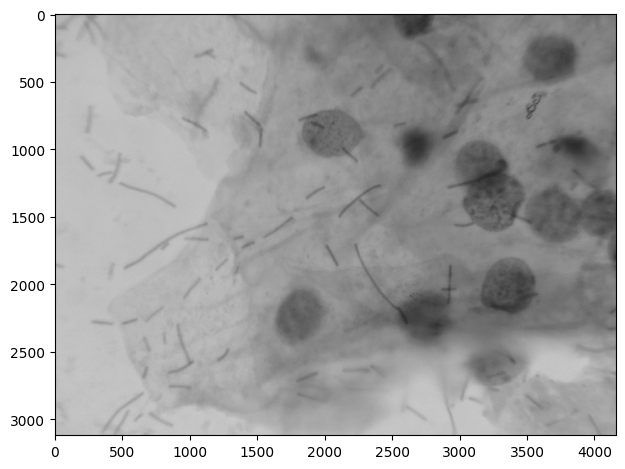

In [ ]:
# Cargar la imagen
candida = io.imread('candida.jpg')
io.imshow(candida)
candida_g=rgb2gray(candida)
io.imshow(candida_g)
plt.show()

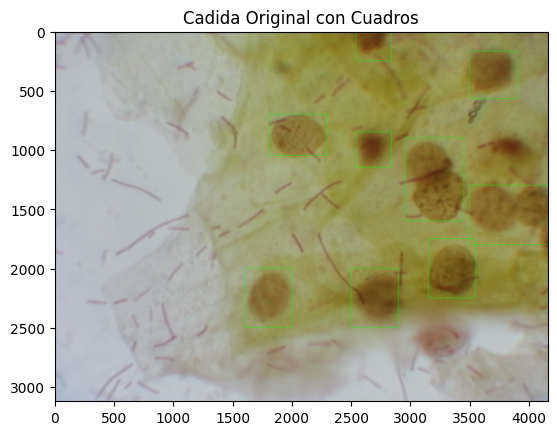

In [ ]:
candida_with_boxes = candida.copy()

# Definir las coordenadas de las regiones rectangulares a resaltar
# Cada región se especifica con (x, y, ancho, alto)
regiones_a_resaltar = [(2540, 0, 300, 250), (3500, 170, 400, 400),(1800, 700, 500, 350), (2540, 850, 300, 300), (2950, 900, 500, 700), (1600, 2000, 400, 500),
                       (2500, 2000, 400, 500), (3150, 1750, 400, 500), (3500, 1300, 800, 500)]

# Dibujar cuadros verdes alrededor de las regiones especificadas
for (x, y, width, height) in regiones_a_resaltar:
    cv2.rectangle(candida_with_boxes, (x, y), (x + width, y + height), (0, 255, 0), 2)



# Mostrar la imagen con los cuadros verdes
# Visualizar la imagen original con cuadros, la imagen final y la imagen final con el filtro Tophat negro
plt.imshow(cv2.cvtColor(candida_with_boxes, cv2.COLOR_BGR2RGB))
plt.title('Cadida Original con Cuadros')
plt.show()

### Erosión

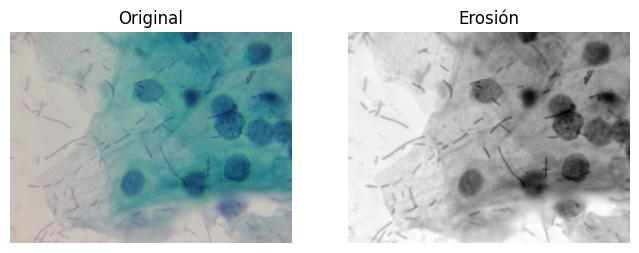

In [ ]:
footprint = disk(6)
eroded_candida= erosion(candida_g, footprint)
plot_comparison(candida_with_boxes, eroded_candida, 'Erosión')

### Dilatación

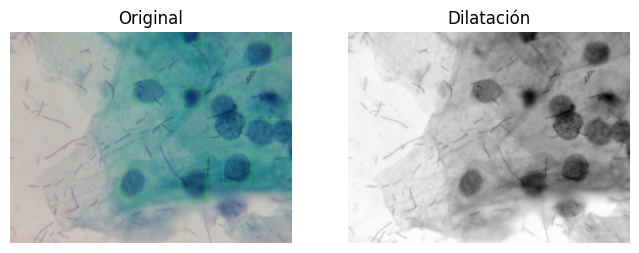

In [ ]:
dilated_candida= dilation(candida_g, footprint)
plot_comparison(candida_with_boxes, dilated_candida, 'Dilatación')

### Apertura

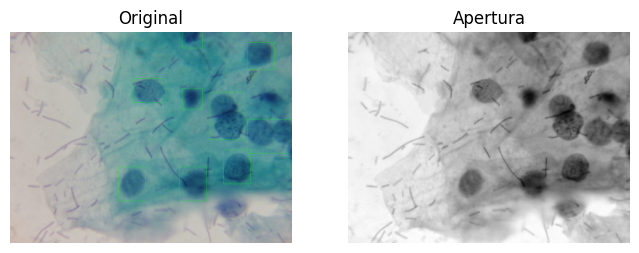

In [ ]:
opened_candida= opening(candida_g, footprint)
plot_comparison(candida_with_boxes, opened_candida, 'Apertura')

### Clausura

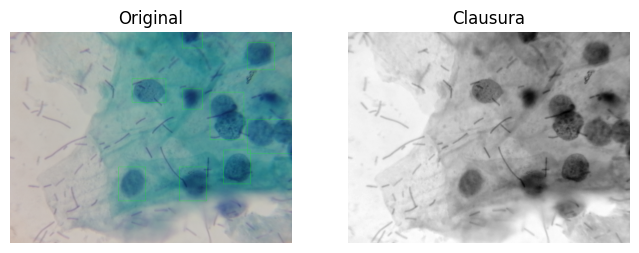

In [ ]:
closed_candida= closing(candida_g, footprint)
plot_comparison(candida_with_boxes, closed_candida, 'Clausura')

### Top Hat Blanco

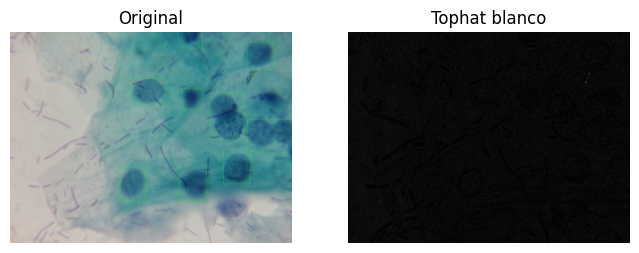

In [ ]:
candida2 = candida_g.copy()
w_tophat_candida= white_tophat(candida2, footprint)
plot_comparison(candida_with_boxes, w_tophat_candida, 'Tophat blanco')

### Top hat negro

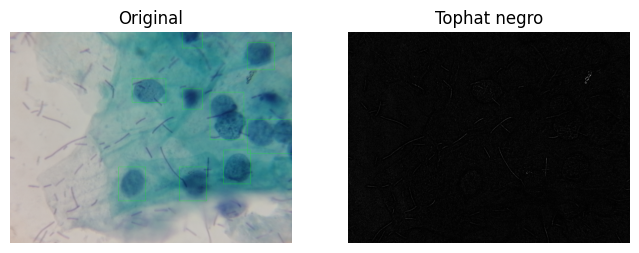

In [ ]:
b_tophat_candida= black_tophat(candida2, footprint)
plot_comparison(candida_with_boxes, b_tophat_candida, 'Tophat negro')

## Vaginosis

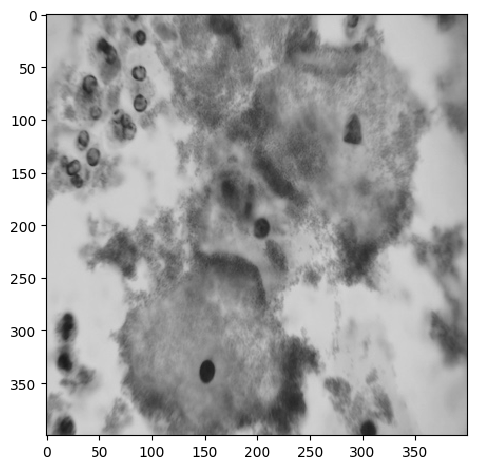

In [ ]:
# Cargar la imagen
vaginosis = io.imread('vaginosis.jpg')
vaginosis_g=rgb2gray(vaginosis)
io.imshow(vaginosis_g)
plt.show()

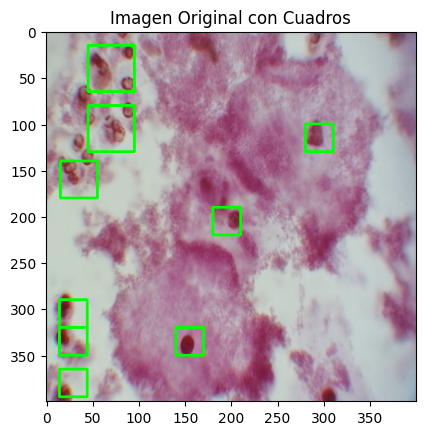

In [ ]:
vaginosis_with_boxes = vaginosis.copy()

# Definir las coordenadas de las regiones rectangulares a resaltar
# Cada región se especifica con (x, y, ancho, alto)
regiones_a_resaltar = [(140, 320, 30, 30), (14, 320, 30, 30),(14, 290, 30, 30), (14, 365, 30, 30), (45, 15, 50, 50), (45, 80, 50, 50), (15, 140, 40, 40),
                       (180, 190, 30, 30), (280, 100, 30, 30)]

# Dibujar cuadros verdes alrededor de las regiones especificadas
for (x, y, width, height) in regiones_a_resaltar:
    cv2.rectangle(vaginosis_with_boxes, (x, y), (x + width, y + height), (0, 255, 0), 2)



# Mostrar la imagen con los cuadros verdes
# Visualizar la imagen original con cuadros, la imagen final y la imagen final con el filtro Tophat negro
plt.imshow(cv2.cvtColor(vaginosis_with_boxes, cv2.COLOR_BGR2RGB))
plt.title('Vaginosis Original con Cuadros')
plt.show()

### Erosión

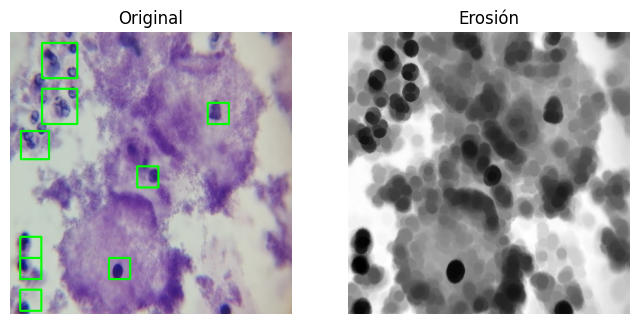

In [ ]:
footprint = disk(6)
eroded_vaginosis= erosion(vaginosis_g, footprint)
plot_comparison(vaginosis_with_boxes, eroded_vaginosis, 'Erosión')

### Dilatación

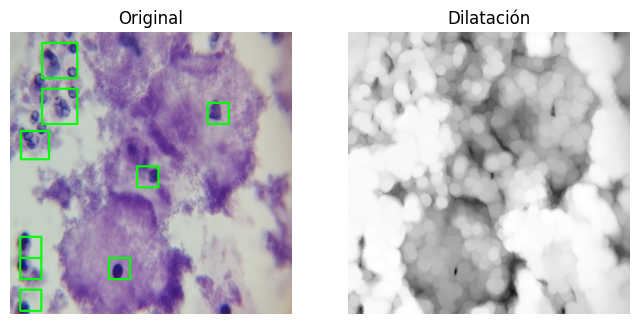

In [ ]:
dilated_vaginosis= dilation(vaginosis_g, footprint)
plot_comparison(vaginosis_with_boxes, dilated_vaginosis, 'Dilatación')

### Apertura

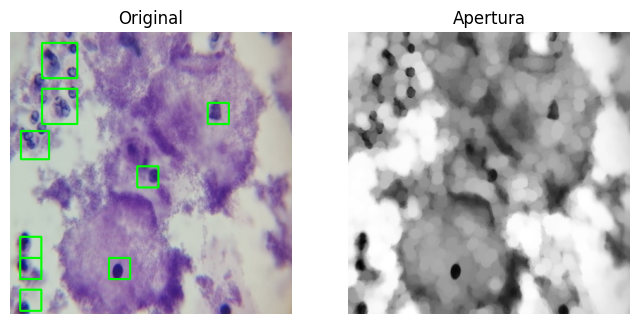

In [ ]:
opened_vaginosis= opening(vaginosis_g, footprint)
plot_comparison(vaginosis_with_boxes, opened_vaginosis, 'Apertura')

### Clausura

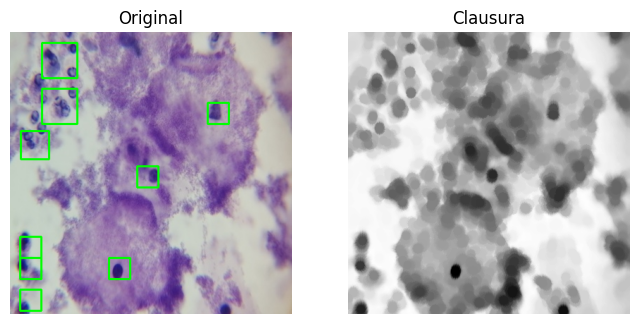

In [ ]:
closed_vaginosis= closing(vaginosis_g, footprint)
plot_comparison(vaginosis_with_boxes, closed_vaginosis, 'Clausura')

### Top Hat Blanco

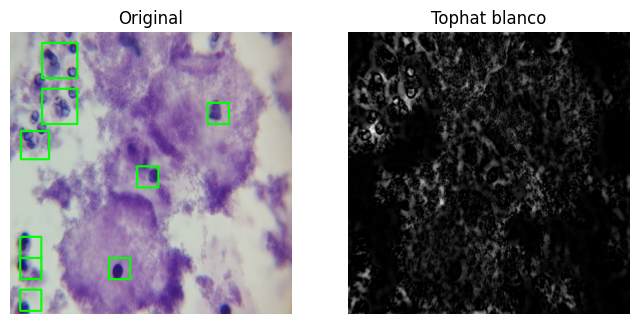

In [ ]:
vaginosis2 = vaginosis_g.copy()
w_tophat_vaginosis= white_tophat(vaginosis2, footprint)
plot_comparison(vaginosis_with_boxes, w_tophat_vaginosis, 'Tophat blanco')

### Top hat negro

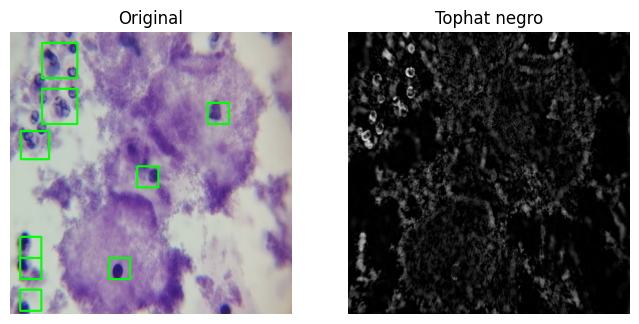

In [ ]:
b_tophat_vaginosis= black_tophat(vaginosis2, footprint)
plot_comparison(vaginosis_with_boxes, b_tophat_vaginosis, 'Tophat negro')

# Conclusiones




*   Dilatación: Con el filtro de dilatación se observa una perdida de las caracteristicas de color esto debido a los bordes entre celulas, imagenes con pocos espacios en blanco y con colores continuos sin variaciones blancas no serán afectados en demasia poreste filtro esto se puede evidenciar en la imagen LIEBG1 y especialmente en Candida.

*   Erosión:  Con el filtro de la erosión se puede observar como son resaltadas las caracteristircas con colores mas oscuros esto se observa de forma mas marcada en las imagenes vaginosis y LIEAG1

*   Apertura: Con este filtro se puede evidenciar un comportamiento en elk que se segmentan de forma controlada los lobulos en las celulas, esto se observa de forma mas clara en la imagen LIEBG1

*   Clausura:Segun el analisis entre la imagen normal y la imagen modificada con la operecion morfologica de clausura, se puede observar que bajo una iterpretacion sobre la imagen las zonas mas oscuras en la gama de grises pueden hacer referencia a puntos importantes en la imagen por lo tanto esta operacion hace mas facil la distincion en una gama monocromatica que entre varios solores de la imagen facilitando la interpretacion tanto para una persona como para una computadora

*   Top Hat Blanco y Top Hat Negro: Tanto para el top hat blanco y negro se puede observar que esta operacion morfologica no es muy adecuada ya que en su mayoria lo que hace es oscurecer todo de una manera que resalta los bordes de todos los conjuntos impidiendo una distincion de las caracteristicas principales por lo menos en este tipo de imagenes







